### YASHASVI VERMA

### INCOME EVALUATION DATASET
DATA CLEARNING        
EDA          
APPLYING RANDOM FOREST ALGORITHM USING MACHINE LEARNING

In [1]:
import pandas as pd

In [2]:
ds = pd.read_csv('C:\Datasets\income_evaluation.csv')

In [3]:
ds.head(1)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K


In [4]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1    workclass       32561 non-null  object
 2    fnlwgt          32561 non-null  int64 
 3    education       32561 non-null  object
 4    education-num   32561 non-null  int64 
 5    marital-status  32561 non-null  object
 6    occupation      32561 non-null  object
 7    relationship    32561 non-null  object
 8    race            32561 non-null  object
 9    sex             32561 non-null  object
 10   capital-gain    32561 non-null  int64 
 11   capital-loss    32561 non-null  int64 
 12   hours-per-week  32561 non-null  int64 
 13   native-country  32561 non-null  object
 14   income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
ds.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
ds.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' income'],
      dtype='object')

'age', 'workclass', 'education','marital-status', 'occupation', 'relationship', 'race', 'sex', 'hours-per-week', 'native-country','income'

In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
le = LabelEncoder()

In [9]:
ds.head(3)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


In [10]:
ds[' sex'].value_counts()

 Male      21790
 Female    10771
Name:  sex, dtype: int64

In [11]:
male_ds = ds[ds[' sex']==' Male']

In [12]:
male_ds

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32553,32,Private,116138,Masters,14,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,0,0,11,Taiwan,<=50K
32554,53,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
32555,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K


In [13]:
female_ds = ds[ds[' sex']==' Female']

In [14]:
female_ds

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
12,23,Private,122272,Bachelors,13,Never-married,Adm-clerical,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32546,37,Private,198216,Assoc-acdm,12,Divorced,Tech-support,Not-in-family,White,Female,0,0,40,United-States,<=50K
32549,43,State-gov,255835,Some-college,10,Divorced,Adm-clerical,Other-relative,White,Female,0,0,40,United-States,<=50K
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


<AxesSubplot:>

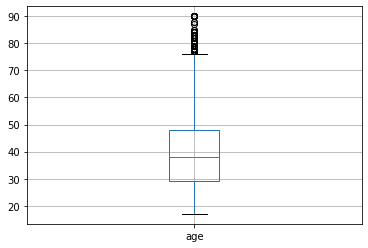

In [15]:
male_ds.boxplot(column= ['age'])

In [16]:
male_ds[male_ds['age']<75]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32553,32,Private,116138,Masters,14,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,0,0,11,Taiwan,<=50K
32554,53,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
32555,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K


In [17]:
male_ds = male_ds[male_ds['age']<75]

<AxesSubplot:>

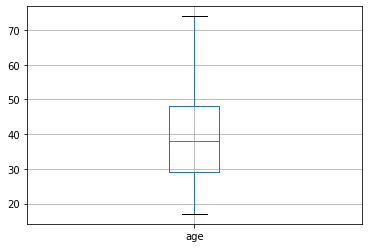

In [18]:
male_ds.boxplot(column= ['age'])

In [19]:
male_ds[' workclass'].value_counts()

 Private             14881
 Self-emp-not-inc     2095
 Local-gov            1248
 Self-emp-inc          960
 ?                     944
 State-gov             808
 Federal-gov           643
 Without-pay             9
 Never-worked            5
Name:  workclass, dtype: int64

In [20]:
male_ds= male_ds[male_ds[' workclass'] != ' ?']

In [21]:
male_ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20649 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              20649 non-null  int64 
 1    workclass       20649 non-null  object
 2    fnlwgt          20649 non-null  int64 
 3    education       20649 non-null  object
 4    education-num   20649 non-null  int64 
 5    marital-status  20649 non-null  object
 6    occupation      20649 non-null  object
 7    relationship    20649 non-null  object
 8    race            20649 non-null  object
 9    sex             20649 non-null  object
 10   capital-gain    20649 non-null  int64 
 11   capital-loss    20649 non-null  int64 
 12   hours-per-week  20649 non-null  int64 
 13   native-country  20649 non-null  object
 14   income          20649 non-null  object
dtypes: int64(6), object(9)
memory usage: 2.5+ MB


In [22]:
male_ds= male_ds[:15000]

In [23]:
male_ds.shape

(15000, 15)

In [24]:
female_ds.shape

(10771, 15)

In [25]:
ds = male_ds.append(female_ds)

In [26]:
ds

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32546,37,Private,198216,Assoc-acdm,12,Divorced,Tech-support,Not-in-family,White,Female,0,0,40,United-States,<=50K
32549,43,State-gov,255835,Some-college,10,Divorced,Adm-clerical,Other-relative,White,Female,0,0,40,United-States,<=50K
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [27]:
ds = ds.reset_index()

In [28]:
ds

,index,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25766,32546,37,Private,198216,Assoc-acdm,12,Divorced,Tech-support,Not-in-family,White,Female,0,0,40,United-States,<=50K
25767,32549,43,State-gov,255835,Some-college,10,Divorced,Adm-clerical,Other-relative,White,Female,0,0,40,United-States,<=50K
25768,32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
25769,32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [29]:
cols = list(ds.columns)

In [30]:
cols.remove('index')

In [31]:
ds=ds[cols]

In [32]:
ds

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25766,37,Private,198216,Assoc-acdm,12,Divorced,Tech-support,Not-in-family,White,Female,0,0,40,United-States,<=50K
25767,43,State-gov,255835,Some-college,10,Divorced,Adm-clerical,Other-relative,White,Female,0,0,40,United-States,<=50K
25768,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
25769,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' income'],
      dtype='object')

In [33]:
ds[' workclass'] = le.fit_transform(ds[' workclass'])
ds[' education'] = le.fit_transform(ds[' education'])
ds[' occupation'] = le.fit_transform(ds[' occupation'])
ds[' relationship'] = le.fit_transform(ds[' relationship'])
ds[' native-country'] = le.fit_transform(ds[' native-country'])
ds[' income'] = le.fit_transform(ds[' income'])
ds[' marital-status'] = le.fit_transform(ds[' marital-status'])

C:\Users\rituv\.conda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\rituv\.conda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\rituv\.conda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

In [34]:
ds.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,7,77516,9,13,4,1,1,White,Male,2174,0,40,39,0
1,50,6,83311,9,13,2,4,0,White,Male,0,0,13,39,0
2,38,4,215646,11,9,0,6,1,White,Male,0,0,40,39,0
3,53,4,234721,1,7,2,6,0,Black,Male,0,0,40,39,0
4,52,6,209642,11,9,2,4,0,White,Male,0,0,45,39,1


In [35]:
from sklearn.preprocessing import OneHotEncoder

In [36]:
ohe = OneHotEncoder()

In [37]:
ds_new = pd.DataFrame(ohe.fit_transform(ds[[' race']]).toarray())

In [38]:
ds_new = ds_new.reset_index()
cols = list(ds_new.columns)
cols.remove('index')
ds_new = ds_new[cols]
ds_new

,0,1,2,3,4
0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...
25766,0.0,0.0,0.0,0.0,1.0
25767,0.0,0.0,0.0,0.0,1.0
25768,0.0,0.0,0.0,0.0,1.0
25769,0.0,0.0,0.0,0.0,1.0


In [39]:
ds_og = pd.concat([ds, ds_new], ignore_index = True )

In [40]:
ds['Col1'] = ds_new[0]
ds['Col2'] = ds_new[1]
ds['Col3'] = ds_new[2]
ds['Col4'] = ds_new[3]
ds['Col5'] = ds_new[4]

In [41]:
ds

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,Col1,Col2,Col3,Col4,Col5
0,39,7,77516,9,13,4,1,1,White,Male,2174,0,40,39,0,0.0,0.0,0.0,0.0,1.0
1,50,6,83311,9,13,2,4,0,White,Male,0,0,13,39,0,0.0,0.0,0.0,0.0,1.0
2,38,4,215646,11,9,0,6,1,White,Male,0,0,40,39,0,0.0,0.0,0.0,0.0,1.0
3,53,4,234721,1,7,2,6,0,Black,Male,0,0,40,39,0,0.0,0.0,1.0,0.0,0.0
4,52,6,209642,11,9,2,4,0,White,Male,0,0,45,39,1,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25766,37,4,198216,7,12,0,13,1,White,Female,0,0,40,39,0,0.0,0.0,0.0,0.0,1.0
25767,43,7,255835,15,10,0,1,2,White,Female,0,0,40,39,0,0.0,0.0,0.0,0.0,1.0
25768,27,4,257302,7,12,2,13,5,White,Female,0,0,38,39,0,0.0,0.0,0.0,0.0,1.0
25769,58,4,151910,11,9,6,1,4,White,Female,0,0,40,39,0,0.0,0.0,0.0,0.0,1.0


In [42]:
ds.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' income', 'Col1', 'Col2', 'Col3', 'Col4', 'Col5'],
      dtype='object')

In [43]:
X = ds[['age', ' workclass', ' fnlwgt', ' education', ' education-num',' marital-status', ' occupation', ' relationship',' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' income', 'Col1', 'Col2', 'Col3', 'Col4', 'Col5']].values
Y = ds[[' sex']].values

In [44]:
from sklearn.model_selection import train_test_split

In [50]:
X_train,  X_test, Y_train, Y_test = train_test_split(X,Y)

USE OF RAVEL FUNCTION

In [57]:
Y_train

array([[' Female'],
       [' Female'],
       [' Male'],
       ...,
       [' Female'],
       [' Female'],
       [' Male']], dtype=object)

In [59]:
Y_train = Y_train.ravel()
Y_train

array([' Female', ' Female', ' Male', ..., ' Female', ' Female', ' Male'],
      dtype=object)

In [51]:
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((19328, 18), (19328, 1), (6443, 18), (6443, 1))

In [52]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [53]:
svc = SVC()

In [54]:
svc.fit(X_train, Y_train)

C:\Users\rituv\.conda\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVC()

In [55]:
rfc = RandomForestClassifier()

In [56]:
rfc.fit(X_train, Y_train)

C:\Users\rituv\.conda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier()

In [60]:
Y_prediction_svc = svc.predict(X_test)
Y_prediction_rfc = rfc.predict(X_test)

In [61]:
from sklearn.metrics import accuracy_score

In [64]:
print(accuracy_score(Y_test,Y_prediction_svc))

0.5685239795126494


In [65]:
print(accuracy_score(Y_test,Y_prediction_rfc))

0.8472761136116715


random forest is bestttt